To efficiently record only the values and their corresponding indices where there is a change in the values of a 1 by n array, this code traverses the array and keeps track of the current and previous values. Whenever a change in value is detected, the code records the value and the index where the change occurred.

In [2]:
import numpy as np

# Example array with repeating sequential elements
arr = np.array([5, 5, 5, 2, 2, 3, 3, 3, 3, 6, 6, 1])

def compress_array(arr):
    # List to hold the result
    result = []
    # Variable to keep track of the last change index
    last_value = arr[0]
    result.append([last_value, 0])  # Start with the first element

    # Iterate through the array starting from the second element
    for i in range(1, len(arr)):
        if arr[i] != last_value:
            last_value = arr[i]
            result.append([last_value, i])
    
    return result

# Call the function and print the result
compressed_array = compress_array(arr)
print(compressed_array)

[[5, 0], [2, 3], [3, 5], [6, 9], [1, 11]]


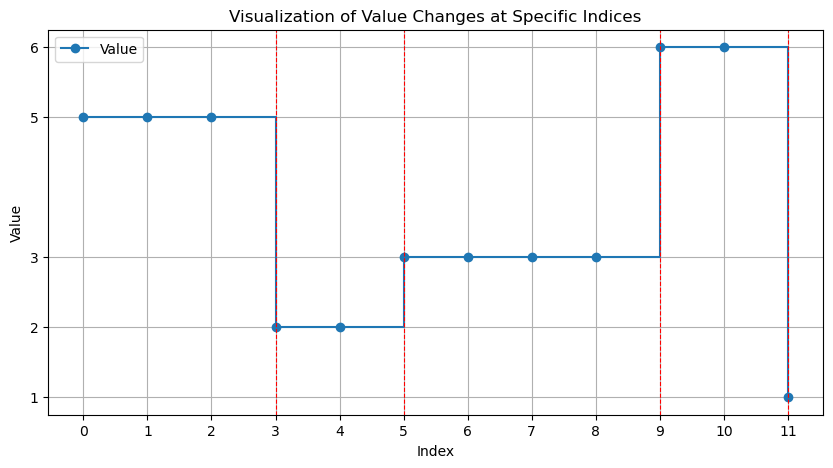

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# The compressed array format: [value, index] from previous discussion
compressed_array = [[5, 0], [2, 3], [3, 5], [6, 9], [1, 11]]

# Expanding the compressed array to full format for visualization
def expand_compressed_array(compressed_array):
    full_array = []
    for i in range(len(compressed_array)):
        value, start_index = compressed_array[i]
        if i == len(compressed_array) - 1:  # Check if it's the last element
            end_index = start_index + 1  # Only one element if it's the last
        else:
            end_index = compressed_array[i + 1][1]
        full_array.extend([value] * (end_index - start_index))
    return full_array

# Expand the compressed array to visualize it
expanded_array = expand_compressed_array(compressed_array)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(expanded_array, drawstyle='steps-post', label='Value', marker='o')
plt.xticks(range(len(expanded_array)), range(len(expanded_array)))
plt.yticks(np.unique(expanded_array), np.unique(expanded_array))

# Add vertical lines at each change point
for value, index in compressed_array[1:]:  # skip the first index as it's the start
    plt.axvline(x=index, color='r', linestyle='--', linewidth=0.8)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Visualization of Value Changes at Specific Indices')
plt.legend()
plt.grid(True)
plt.show()
